<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Laboratorio 4 - Contexto</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> 2025-1</h2>
</center>


# Librerías (no utilizar liberías adicionales)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider,Dropdown
from matplotlib import colormaps

FS = 20
plt.rcParams.update({
    'font.size': FS,
    'axes.labelsize': FS,
    'font.family': 'sans-serif',
    'font.sans-serif': 'DejaVu Sans'
})

def interactive_solver_1D(f_tmp, fp, a=0.5):
    f = lambda x: f_tmp(x) - a
    def f_ivp(t, y, a):
        return -2*f(y)*fp(y)
    T = 2
    m = 10
    x0 = np.linspace(-2, 3, m)
    color_index = np.linspace(0, 1, m)
    N = 1000
    t_eval = np.linspace(0, T, N)
    out_sol = np.zeros((m, N))
    for i in np.arange(m):
        sol = solve_ivp(f_ivp, t_span=(0, T), y0=[x0[i]], t_eval=t_eval, args=(a,))
        out_sol[i] = sol.y[0]
    cmap = colormaps['gist_rainbow']
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    xx = np.linspace(np.min(out_sol), np.max(out_sol), 1000)
    plt.plot(xx, f(xx) - a, '-b', label=r'$f(x)$')
    plt.plot(xx, fp(xx), '-k', label=r"$\dfrac{\mathrm{d}f}{\mathrm{d}x}(x)$")
    for i in np.arange(m):
        plt.plot(x0[i], 0, '.', markersize=12, color=cmap(color_index[i]), label=None)
    plt.xlabel('$x$')
    plt.title('Función en estudio y su derivada')
    plt.grid(True)
    plt.legend(loc='best')
    plt.ylim([-6, 6])
    plt.subplot(1, 2, 2)
    for i in np.arange(m):
        plt.plot(t_eval, out_sol[i], '-', linewidth=2.5, color=cmap(color_index[i]), alpha=0.8)
        plt.plot(0, x0[i], '.', markersize=12, color=cmap(color_index[i]))
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.title('Evolución temporal')
    plt.grid(True)
    plt.ylim([-2, 3])
    plt.tight_layout()
    plt.show()

funcs = {
    'f(x) = x²-a': (lambda x: x**2, lambda x: 2*x),
    'f(x) = sin(x²)-a': (lambda x: np.sin(x**2), lambda x: np.cos(x**2)*2*x)
}

def choose_and_plot(f_type='f(x) = x²-a', a=0.5):
    f, fp = funcs[f_type]
    interactive_solver_1D(f, fp, a)

## Optimización en 1D: Newton y Gradiente Descendente Continuo

Supongamos que queremos minimizar la siguiente función:

$$
\mathscr{L}\left(x\right) = \dfrac{1}{2} f^2\left(x\right),
$$

donde $x \in \mathbb{R}$ y $f: \mathbb{R} \to \mathbb{R}$. Se asume que solo se tiene acceso a la evaluación de $f\left(x\right)$ y su derivada $f'\left(x\right)$, junto a un valor inicial $x_0$.

### Método de Newton aplicado a $\mathscr{L}\left(x\right)$

Una alternativa directa consiste en aplicar el método de Newton para encontrar los puntos críticos de $\mathscr{L}\left(x\right)$. Esto lleva a la siguiente iteración de punto fijo:

$$
x_{i+1}
= x_i - \frac{\mathscr{L}'\left(x_i\right)}{\mathscr{L}''\left(x_i\right)}
= x_i - \frac{f\left(x_i\right)\,f'\left(x_i\right)}{\left(f'\left(x_i\right)\right)^2 + f\left(x_i\right)\,f''\left(x_i\right)}
= x_i - \frac{f\left(x_i\right)\,f'\left(x_i\right)}{\left(f'\left(x_i\right)\right)^2 + f\left(x_i\right)\,f''\left(x_i\right)}.
$$

En este desarrollo, se observa que el método requiere calcular la segunda derivada $f''\left(x\right)$, además de $f\left(x\right)$ y $f'\left(x\right)$.

### Gradiente Descendente Continuo

Otra alternativa, conocida como **Gradiente Descendente Continuo**, consiste en interpretar la variable $x$ como dependiente del tiempo $t$, es decir, se define una trayectoria $x\left(t\right)$. Así, la función objetivo se transforma en:

$$
\mathscr{L}\left(x\left(t\right)\right) = \dfrac{1}{2}f^2\left(x\left(t\right)\right).
$$

El objetivo es encontrar una evolución para $x\left(t\right)$ tal que $\mathscr{L}\left(x\left(t\right)\right)$ sea no creciente en el tiempo, es decir,

$$
\dfrac{\mathrm{d}}{\mathrm{dt}}\mathscr{L}\left(x\left(t\right)\right) \le 0.
$$

Para esto, se calcula la derivada temporal de $\mathscr{L}\left(x\left(t\right)\right)$:

$$
\dfrac{\mathrm{d}}{\mathrm{dt}}\mathscr{L}\left(x\left(t\right)\right)
\dfrac{\mathrm{d}}{\mathrm{dt}}\left(\dfrac{1}{2}f^2\left(x\left(t\right)\right)\right)
= f\left(x\left(t\right)\right)\,f'\left(x\left(t\right)\right)\,\dot{x}\left(t\right).
$$

Si se elige la evolución

$$
\dot{x}\left(t\right) = -\,f\left(x\left(t\right)\right)\,f'\left(x\left(t\right)\right),
$$

y se reemplaza en la ecuación anterior, se obtiene:

$$
\dfrac{\mathrm{d}}{\mathrm{dt}}\mathscr{L}\left(x\left(t\right)\right)
= f\left(x\left(t\right)\right)\,f'\left(x\left(t\right)\right)\left[-\,f\left(x\left(t\right)\right)\,f'\left(x\left(t\right)\right)\right]
= -\,f^2\left(x\left(t\right)\right)\,\left(f'\left(x\left(t\right)\right)\right)^2,
$$

lo cual es negativo para todo $x$ salvo en los puntos donde $f\left(x\right)=0$ o $f'\left(x\right)=0$.

Por lo tanto, esta elección asegura que $\mathscr{L}\left(x\left(t\right)\right)$ disminuye con el tiempo, y el proceso de minimización se traduce en el siguiente problema de valor inicial (IVP):

$$
\begin{align*}
    \dot{x}\left(t\right) &= -\,f\left(x\left(t\right)\right)\,f'\left(x\left(t\right)\right),\\
    x\left(0\right) &= x_0.
\end{align*}
$$
o equivalentemente
$$
\begin{align*}
    \dot{x}\left(t\right) &= -\left.\dfrac{\mathrm{d}\mathscr{L}}{\mathrm{d}x}(x)\right|_{x=x(t)}=-\,f\left(x\left(t\right)\right)\,f'\left(x\left(t\right)\right),\\
    x\left(0\right) &= x_0.
\end{align*}
$$

Este IVP puede ser resuelto numéricamente, por ejemplo, utilizando `solve_ivp` de SciPy.


A continuación se presenta una forma de cómo implementar el algoritmo

Primero, se define la función objetivo $f\left(x\right)=x^2-a$ y su derivada $f'\left(x\right)=2\,x$.


In [2]:
a = 0.5
f = lambda x: x**2-a
fp = lambda x: 2*x

Se define la función de la ecuación diferencial ordinaria (ODE), según la deducción anterior:

$$
\dot{x}(t) = -f(x)\,f'(x) = - \left( x^{2} - 0.5 \right) \, 2 \, x.
$$


In [3]:
def f_ivp(t, y, a):
    return -f(y)*fp(y)

Para analizar el comportamiento desde diferentes puntos de partida, se define un conjunto de valores iniciales $x_0$ y se establece el dominio temporal para la integración.


In [4]:
T = 2
N = 1000
t_eval = np.linspace(0, T, N)
x0_vals = np.linspace(-2, 3, 10)

Se resuelve el IVP para cada condición inicial y se almacenan las trayectorias.

In [5]:
out_sol = np.zeros((len(x0_vals), N))

for i, x0 in enumerate(x0_vals):
    sol = solve_ivp(f_ivp, t_span=(0, T), y0=[x0], t_eval=t_eval, args=(a,))
    out_sol[i] = sol.y[0]


A continuación se presenta una herramienta interactiva para explorar visualmente el comportamiento del método de Gradiente Descendente Continuo aplicado a distintas funciones $f\left(x\right)$ y valores de desplazamiento $a$.

**La visualización consta de dos gráficos:**

1. **Gráfico de la función y sus derivadas**  
   - En el eje $x$ se muestran la función $f\left(x\right)$ (en azul) y su derivada $f'\left(x\right)$ (en negro).  
   - Los puntos de colores sobre el eje horizontal indican los distintos valores iniciales $x_0$ desde los que comienza cada trayectoria.

   **¿Qué observar?**  
   - Los ceros de $f\left(x\right)$ corresponden a los valores a los que tenderán las trayectorias del gradiente descendente (es decir, los puntos estacionarios buscados por el algoritmo).  
   - La derivada ayuda a analizar la estabilidad de estos puntos.

2. **Gráfico de la evolución temporal $x\left(t\right)$**  
   - Muestra, para cada valor inicial $x_0$, la trayectoria temporal $x\left(t\right)$ que resulta de integrar el problema de valor inicial asociado al método.

   **¿Qué observar?**  
   - Cómo, dependiendo del valor inicial, el sistema converge a distintos puntos estacionarios.  
   - ¿Qué sucede si la función tiene varios mínimos?: algunas trayectorias pueden dirigirse a diferentes pozos de potencial.

La interfaz permite variar el parámetro $a$ para estudiar cómo cambian los puntos estacionarios y el comportamiento de las trayectorias.


In [6]:
interact(
    choose_and_plot,
    f_type=Dropdown(options=list(funcs.keys()), value='f(x) = x²-a', description='Función:'),
    a=FloatSlider(min=-5, max=5, step=0.01, value=0.5, description='a')
)

interactive(children=(Dropdown(description='Función:', options=('f(x) = x²-a', 'f(x) = sin(x²)-a'), value='f(x…

<function __main__.choose_and_plot(f_type='f(x) = x²-a', a=0.5)>

Por otro lado, al aplicar gradiente descendente continuo directamente sobre $\mathscr{L}\left(x\right) = f\left(x\right)$, el proceso dinámico se describe por:

$$
\dot{x}\left(t\right) = -\,f'\left(x\left(t\right)\right)
$$

Esto corresponde al gradiente descendente clásico: la variable $x$ evoluciona en la dirección opuesta al gradiente de $f$.

Durante la evolución, la función objetivo $f\left(x\left(t\right)\right)$ decrece de manera monótona, ya que su derivada respecto del tiempo es siempre no positiva:

$$
\dfrac{\mathrm{d}}{\mathrm{dt}}f\left(x\left(t\right)\right) = f'\left(x\left(t\right)\right)\,\dot{x}\left(t\right) = -\left[f'\left(x\left(t\right)\right)\right]^2 \le 0
$$

Este mecanismo lleva la trayectoria $x\left(t\right)$ hacia puntos críticos de $f\left(x\right)$, es decir, hacia valores donde $f'\left(x\right) = 0$. Dependiendo del punto de partida y de la forma de la función, estos puntos pueden corresponder a mínimos, máximos o puntos de inflexión.

Para que el método tenga sentido práctico y logre encontrar un mínimo real, es fundamental que la función $f\left(x\right)$ esté acotada inferiormente. Si $f\left(x\right)$ no posee un mínimo, por ejemplo si tiende a $-\infty$ para ciertos valores de $x$, el algoritmo no se estabiliza y $x\left(t\right)$ diverge. Además, a diferencia del caso cuadrático $\mathscr{L}\left(x\right) = \left[f\left(x\right)\right]^2$, aquí el proceso no necesariamente lleva a $f\left(x\right)=0$, sino al mínimo posible de la función, que puede tomar cualquier valor.

Se ilustra este comportamiento usando la función $f\left(x\right) = x^2 - 2$, cuyo mínimo global se alcanza en $x = 0$ y el valor mínimo es $-2$.


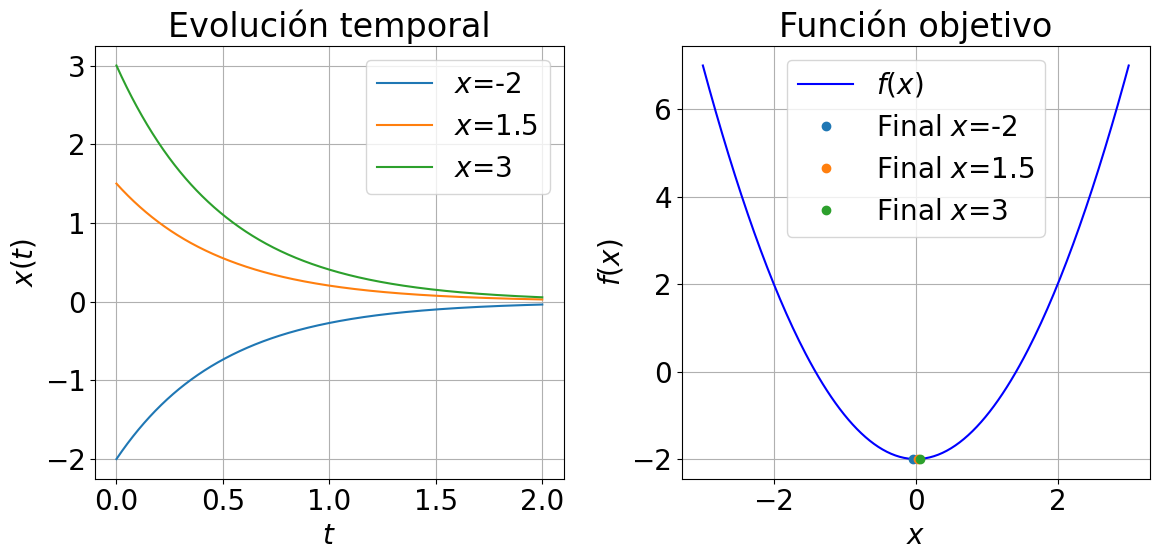

In [7]:
f = lambda x: x**2 - 2
fp = lambda x: 2*x

def f_ivp(t, y):
    return -fp(y)

T = 2
N = 1000
t_eval = np.linspace(0, T, N)
x0_vals = [-2, 1.5, 3]
out_sol = np.zeros((len(x0_vals), N))

for i, x0 in enumerate(x0_vals):
    sol = solve_ivp(f_ivp, t_span=(0, T), y0=[x0], t_eval=t_eval)
    out_sol[i] = sol.y[0]

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
for i, x0 in enumerate(x0_vals):
    plt.plot(t_eval, out_sol[i], label=f'$x$={x0}')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.title('Evolución temporal')
plt.legend()
plt.grid(True)

xx = np.linspace(-3, 3, 200)
plt.subplot(1,2,2)
plt.plot(xx, f(xx), '-b', label='$f(x)$')
for i, x0 in enumerate(x0_vals):
    plt.plot(out_sol[i,-1], f(out_sol[i,-1]), 'o', label=f'Final $x$={x0}')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Función objetivo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

En este ejemplo, todas las trayectorias evolucionan hacia el mínimo global en $x=0$, alcanzando el valor mínimo $f(0) = -2$.

## Optimización en 2D (y dimensiones superiores): Resolviendo sistemas lineales

Consideremos ahora el problema de optimizar una función que depende de dos variables, que surge naturalmente al resolver un sistema lineal de dos ecuaciones con dos incógnitas:

Dado un sistema lineal representado por la matriz $A\in\mathbb{R}^{2\times2}$ y el vector $\mathbf{b}\in\mathbb{R}^2$,

$$
A\,\mathbf{x} = \mathbf{b},
$$

deseamos encontrar la solución $\mathbf{x}\in\mathbb{R}^2$ que satisfaga esta ecuación.

De manera análoga al caso unidimensional, podemos definir una función objetivo que represente el error cuadrático total entre ambos lados del sistema lineal. Sea esta función $\mathscr{L}\left(\mathbf{x}\right)$ definida como:

$$
\mathscr{L}\left(x_1, x_2\right) = \dfrac{1}{2}\left(b_1 - a_{1,1}\,x_1 - a_{1,2}\,x_2\right)^2 + \dfrac{1}{2}\left(b_2 - a_{2,1}\,x_1 - a_{2,2}\,x_2\right)^2.
$$

En forma vectorial (que facilita su generalización a más dimensiones):

$$
\mathscr{L}\left(\mathbf{x}\right) =\dfrac{1}{2} \left\|\mathbf{b} - A\,\mathbf{x}\right\|_2^2 = \dfrac{1}{2}\left\|\mathbf{r}\left(\mathbf{x}\right)\right\|_2^2,
$$

donde el vector de residuales está dado por $\mathbf{r}\left(\mathbf{x}\right) = \mathbf{b} - A\,\mathbf{x}$.


Notemos que minimizar esta función objetivo implica directamente resolver el sistema original, ya que el mínimo ocurre exactamente cuando $\mathbf{b} - A\,\mathbf{x} = \mathbf{0}$.

Siguiendo la misma lógica que en la dimensión anterior, definamos ahora la variable $\mathbf{x}\left(t\right)$ como dependiente del tiempo, es decir, una trayectoria en el espacio bidimensional. La función objetivo se convierte en:

$$
\mathscr{L}\left(x_1\left(t\right), x_2\left(t\right)\right) = \dfrac{1}{2}\left(b_1 - a_{1,1}\,x_1\left(t\right) - a_{1,2}\,x_2\left(t\right)\right)^2 + \dfrac{1}{2}\left(b_2 - a_{2,1}\,x_1\left(t\right) - a_{2,2}\,x_2\left(t\right)\right)^2.
$$


Para asegurar la disminución de la función objetivo, necesitamos que la derivada temporal $\dfrac{\mathrm{d}}{\mathrm{dt}}\mathscr{L}\left(\mathbf{x}\left(t\right)\right)$ sea negativa o cero. Calculando dicha derivada, obtenemos:

$$
\dfrac{\mathrm{d}}{\mathrm{dt}}\mathscr{L}\left(\mathbf{x}\left(t\right)\right) =\mathbf{r}\left(\mathbf{x}\left(t\right)\right)^\top \left(-A\,\dot{\mathbf{x}}\left(t\right)\right).
$$

Por lo tanto, para asegurar que la función objetivo decrezca en el tiempo, elegimos la evolución de las variables como:

$$
\dot{\mathbf{x}}\left(t\right) = A^\top\,\mathbf{r}\left(\mathbf{x}\left(t\right)\right).
$$

Reemplazando en la expresión anterior:

$$
\dfrac{\mathrm{d}}{\mathrm{dt}}\mathscr{L}\left(\mathbf{x}\left(t\right)\right) = -\left\|A^\top\,\mathbf{r}\left(\mathbf{x}\left(t\right)\right)\right\|_2^2,
$$


lo que claramente es una cantidad negativa o cero.

Este procedimiento lleva directamente al siguiente problema de valor inicial (IVP) para encontrar numéricamente la solución del sistema lineal:

$$
\begin{align*}
\dot{\mathbf{x}}\left(t\right) &= A^\top\,\left(\mathbf{b} - A\,\mathbf{x}\left(t\right)\right),\\
\mathbf{x}\left(0\right) &= \mathbf{x}_0.
\end{align*}
$$
o equivalentemente
$$
\begin{align*}
    \dot{\mathbf{x}}\left(t\right) &= -\left.\nabla \mathscr{L}(x)\right|_{\mathbf{x}=\mathbf{x}(t)}=-A^\top\,\left(\mathbf{b} - A\,\mathbf{x}\left(t\right)\right),\\
    \mathbf{x}\left(0\right) &= \mathbf{x}_0..
\end{align*}
$$

Al resolver numéricamente este IVP desde una condición inicial dada (por ejemplo, la condición inicial nula), la trayectoria evoluciona hasta alcanzar la solución del sistema lineal original.


A continuación se presenta cómo implementar y resolver el problema de valor inicial que modela la evolución de $\mathbf{x}\left(t\right)$ hacia la solución del sistema lineal $A\,\mathbf{x} = \mathbf{b}$, utilizando el enfoque de gradiente descendente continuo.

Primero definimos el sistema dinámico que está dado por la expresión:

$$
\dot{\mathbf{x}}\left(t\right) = A^\top \left(\mathbf{b} - A\,\mathbf{x}\left(t\right)\right).
$$


In [8]:
def f_Axb(t, y, A, b):
    r = b - A @ y
    return A.T @ r

Definimos las condiciones iniciales para explorar cómo afecta el punto de partida a la trayectoria, se parametrizan los valores iniciales $\left(x_1\left(0\right), x_2\left(0\right)\right)$:


In [9]:
y0 = np.zeros(2)
A = np.array([[1, 2],
              [3, 4]])
b = np.array([1, 2])
sol = solve_ivp(f_Axb, [0, 50], y0, args=(A, b), dense_output=True)

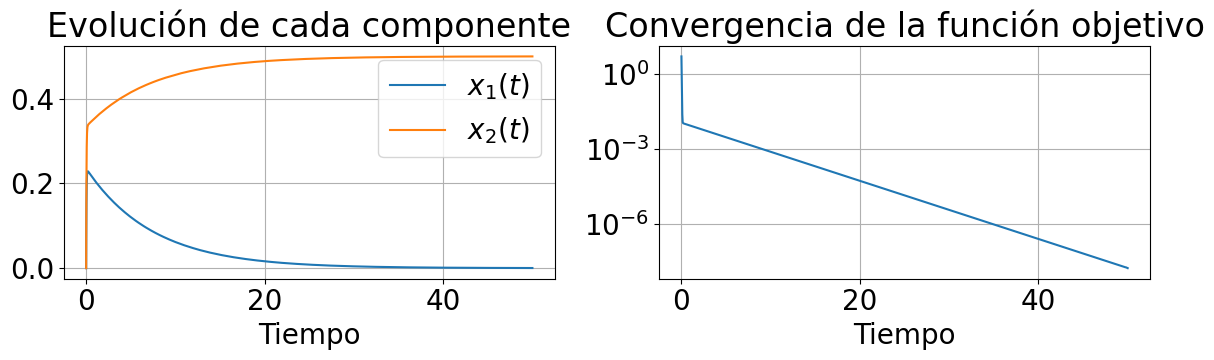

In [10]:
t = sol.t
x1 = sol.y[0]
x2 = sol.y[1]
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x1, label='$x_1(t)$')
plt.plot(t, x2, label='$x_2(t)$')
plt.xlabel('Tiempo')
plt.grid(True)
plt.legend()
plt.title('Evolución de cada componente')
plt.subplot(1, 2, 2)
residuals = np.linalg.norm(b - (A @ sol.y).T, axis=1)
plt.semilogy(t, residuals**2, label=r'$\|\mathbf{r}(t)\|^2$')
plt.xlabel('Tiempo')
plt.grid(True)
plt.title('Convergencia de la función objetivo')
plt.tight_layout()
plt.show()

A continuación se muestra un visualizador interactivo que permite explorar cómo evoluciona la solución de un sistema lineal utilizando el método de gradiente descendente continuo.

La evolución de $\mathbf{x}\left(t\right)$ se calcula resolviendo el problema de valor inicial:

$$
\begin{cases}
\dot{\mathbf{x}}\left(t\right) = A^\top \left(\mathbf{b} - A\,\mathbf{x}\left(t\right)\right),\\
\mathbf{x}\left(0\right) = \mathbf{x}_0.
\end{cases}
$$

Se presentan diferentes ejemplos seleccionados para observar cómo las condiciones iniciales y la estructura del sistema afectan la dinámica.


In [11]:
def plot_solution_2D(case='Clásico', x10=0., x20=0.):
    if case == 'Clásico':
        A = np.array([[1, 2],
                      [3, 4]])
        b = np.array([1, 2])
    elif case == 'Rotado':
        A = np.array([[2, -1],
                      [1, 3]])
        b = np.array([2, -1])
    elif case == 'Simétrico':
        A = np.array([[2, 1],
                      [1, 2]])
        b = np.array([3, 3])
    elif case == 'Vertical':
        A = np.array([[0, 1],
                      [0, 2]])
        b = np.array([2, 4])
    elif case == 'Lento':
        A = np.array([[0.2, 0],
                      [0, 0.1]])
        b = np.array([1, -1])

    y0 = np.array([x10, x20])
    sol = solve_ivp(f_Axb, [0, 50], y0, args=(A, b), dense_output=True)

    t = sol.t
    x1 = sol.y[0]
    x2 = sol.y[1]
    residuals = np.linalg.norm(b - (A @ sol.y).T, axis=1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(t, x1, label='$x_1(t)$')
    plt.plot(t, x2, label='$x_2(t)$')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de $x(t)$')
    plt.title(f'Evolución temporal - Caso: {case}')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.semilogy(t, residuals**2, label=r'$||\mathbf{r}(t)||^2$')
    plt.xlabel('Tiempo')
    plt.ylabel('Error cuadrático')
    plt.title('Evolución de la función objetivo')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

interact(
    plot_solution_2D,
    case=Dropdown(options=['Clásico', 'Rotado', 'Simétrico', 'Vertical', 'Lento'], value='Clásico', description='Sistema:'),
    x10=FloatSlider(min=-5, max=5, step=0.1, value=0., description='$x_1(0)$'),
    x20=FloatSlider(min=-5, max=5, step=0.1, value=0., description='$x_2(0)$')
)

interactive(children=(Dropdown(description='Sistema:', options=('Clásico', 'Rotado', 'Simétrico', 'Vertical', …

<function __main__.plot_solution_2D(case='Clásico', x10=0.0, x20=0.0)>

A continuación se presenta un visualizador interactivo para explorar cómo evoluciona la solución de un sistema lineal en $\mathbb{R}^4$:

$$
\dot{\mathbf{x}}\left(t\right) = A^\top \left(\mathbf{b} - A\,\mathbf{x}\left(t\right)\right),\quad
\mathbf{x}\left(0\right) = \mathbf{x}_0.
$$

Podrás modificar el tiempo total de simulación $T$ y observar si las soluciones $\mathbf{x}(t)$ y la función $\mathscr{L}(\mathbf{x}(t)) = \dfrac{1}{2}||\mathbf{b} - A\mathbf{x}(t)||_2^2$ convergen o no durante el intervalo simulado.


In [12]:
def solve_and_plot_R4(T=10.0):
    A = np.array([[1,  0, 2, -1],
                  [0,  3, 1,  2],
                  [2, -1, 1,  1],
                  [1,  1, 0,  2]])
    b = np.array([1, 2, 0, -1])
    x0 = np.array([-2., 0., 3., 1.])

    t_eval = np.linspace(0, T, 500)
    sol = solve_ivp(f_Axb, [0, T], x0, args=(A, b), t_eval=t_eval)

    plt.figure(figsize=(10, 5))
    for i in range(4):
        plt.plot(sol.t, sol.y[i], label=rf'$x_{{{i+1}}}(t)$')
    plt.xlabel('Tiempo')
    plt.ylabel('Componentes de $\mathbf{x}(t)$')
    plt.title(r'Evolución de la solución en $\mathbb{R}^4$')
    plt.grid(True)
    plt.legend()
    plt.show()

    residuals = np.linalg.norm(b[:, None] - A @ sol.y, axis=0)
    plt.figure(figsize=(6, 4))
    plt.semilogy(sol.t, residuals**2, label=r'$\mathscr{L}(\mathbf{x}(t)) = \frac{1}{2}||\mathbf{r}(\mathbf{x}(t))||_2^2$')
    plt.xlabel('Tiempo')
    plt.ylabel('Error cuadrático')
    plt.title('Convergencia de la función objetivo $\mathscr{L}(\mathbf{x}(t))$')
    plt.grid(True)
    plt.legend()
    plt.show()

interact(
    solve_and_plot_R4,
    T=FloatSlider(min=1, max=50, step=1, value=10, description='Tiempo T')
);

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
/var/folders/yv/jrm90ycn6nd7n0wnpd3qqx540000gn/T/ipykernel_56670/2125091188.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Componentes de $\mathbf{x}(t)$')
/var/folders/yv/jrm90ycn6nd7n0wnpd3qqx540000gn/T/ipykernel_56670/2125091188.py:27: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Convergencia de la función objetivo $\mathscr{L}(\mathbf{x}(t))$')


interactive(children=(FloatSlider(value=10.0, description='Tiempo T', max=50.0, min=1.0, step=1.0), Output()),…

Hasta ahora, todo el desarrollo se ha centrado en sistemas lineales, donde la función objetivo $\mathscr{L}\left(\mathbf{x}\right)$ tiene una forma cuadrática, el gradiente se calcula de forma exacta, y la evolución dinámica converge de manera suave hacia la solución exacta del sistema.

Sin embargo, en problemas reales es muy común enfrentarse a funciones no lineales. 
En estos casos, la función objetivo puede involucrar términos como funciones trigonométricas, exponenciales, productos cruzados, funciones racionales, entre otras, y la dinámica de evolución se vuelve más compleja.

Se sugiere al estudiante investigar y reflexionar sobre los siguientes aspectos:

¿Cómo se formula el problema de evolución dinámica cuando $\mathscr{L}\left(\mathbf{x}\right)$ es no lineal?

¿Qué ocurre con la derivada en ese caso? ¿Cómo se define el gradiente $\nabla \mathscr{L}\left(\mathbf{x}\right)$ cuando la función es más compleja?

Recordando que el gradiente de $\mathscr{L}\left(\mathbf{x}\right)$  denotado como $\nabla \mathscr{L}\left(\mathbf{x}\right)$ es el vector de derivadas parciales de $\mathscr{L}$ respecto a cada componente de $\mathbf{x}$:

$$
\nabla \mathscr{L}\left(\mathbf{x}\right) = \left[ \frac{\partial \mathscr{L}}{\partial x_1}, \frac{\partial \mathscr{L}}{\partial x_2}, \dots, \frac{\partial \mathscr{L}}{\partial x_n} \right]^\top.
$$


¿Qué pasa si no se puede calcular el gradiente de forma analítica? ¿Qué herramientas existen para aproximarlo?

¿Qué diferencias aparecen en el comportamiento de la trayectoria $\mathbf{x}\left(t\right)$? ¿Siempre converge? ¿Puede oscilar?

¿Qué tipo de problemas reales (por ejemplo, en física, machine learning o economía) involucran funciones objetivo no lineales?
